In [3]:
import requests
def get_usgs_gw1(state, start_year):
    where = "stateCd={}".format(state)
    waterservices = "https://waterservices.usgs.gov/nwis/gwlevels/?format=json&siteStatus=active&startDT=%s-01-01&siteType=GW&parameterCd=72019&%s" % (start_year, where)
    #try:
    req = requests.post(waterservices) 
    return req.json()
    #except:
        #return {"error": "Error on USGS access"}

# get daily groundwater value for stations in a state (1900-present) = this gets daily means
def get_usgs_gw2(state, start_year):
    where = "stateCd={}".format(state)
    waterservices = "https://waterservices.usgs.gov/nwis/dv/?format=json&siteStatus=active&startDT=%s-01-01&endDT=2024-01-03&siteType=GW&parameterCd=72019&%s" % (start_year, where)
    try:
        req = requests.post(waterservices) 
        return req.json()
    except:
        return {"error": "Error on USGS access 2"}

In [2]:
# Date collection
def get_gw_date(data, site, index):
    return data["value"]["timeSeries"][site]["values"][0]["value"][index]["dateTime"][0:10]

# Value
def get_gw_value(data, site, index):
    return float(data["value"]["timeSeries"][site]["values"][0]["value"][index]["value"])

# Site name
def get_site(data, site):
    return data["value"]["timeSeries"][site]["sourceInfo"]["siteName"]

# Coordinates
def get_coordinates(data, site):
    coordinates = [data["value"]["timeSeries"][site]["sourceInfo"]["geoLocation"]["geogLocation"]["latitude"], data["value"]["timeSeries"][site]["sourceInfo"]["geoLocation"]["geogLocation"]["longitude"]]
    return coordinates

# Show all data for a site
def show_site_data(data, site):
    graph = {}
    values_len = len(data["value"]["timeSeries"][site]["values"][0]["value"])
    for i in range(values_len):
        print(f"   {get_gw_date(data, site, i)}:  {get_gw_value(data, site, i)}")
        graph[get_gw_date(data, site, i)] = get_gw_value(data, site, i)
    return graph


data in VT
Site: VT-CKW    1   [43.2647222, -72.5844444]
   2020-01-27:  5.73
   2020-02-26:  5.23
   2020-04-30:  4.29
   2020-05-28:  5.49
   2020-06-29:  5.92
   2020-07-27:  6.1
   2020-08-27:  6.24
   2020-09-25:  6.32
   2020-10-27:  5.62
   2020-11-27:  5.16
   2020-12-28:  3.13
   2021-01-26:  5.38
   2021-02-26:  5.42
   2021-03-26:  3.71
   2021-04-26:  4.59
   2021-05-26:  5.36
   2021-06-25:  5.79
   2021-07-26:  4.41
   2021-08-26:  5.36
   2021-09-26:  5.37
   2021-10-27:  4.6
   2021-11-28:  4.94
   2021-12-27:  4.93
   2022-01-27:  5.46
   2022-02-26:  4.22
   2022-03-28:  3.67
   2022-04-27:  4.43
   2022-05-26:  5.3
   2022-06-28:  5.97
   2022-07-26:  5.87
   2022-08-28:  5.91
   2022-09-26:  5.12
   2022-10-25:  5.54
   2022-11-28:  5.26
   2022-12-15:  4.87
   2022-12-26:  3.52
   2023-01-03:  4.0
   2023-01-27:  4.64
   2023-02-09:  5.16
   2023-02-27:  4.9
   2023-03-27:  3.48
   2023-04-03:  3.06
   2023-04-26:  3.67
   2023-05-26:  5.02
   2023-06-05:  5.55
   

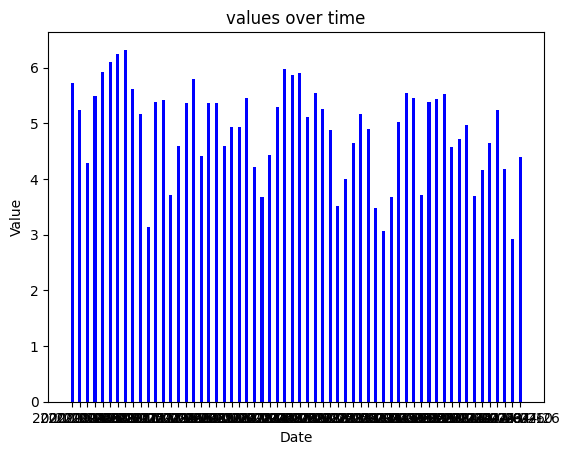

In [4]:
# Get data for a specific site
import numpy as np
import matplotlib.pyplot as plt

# MODIFY THESE
state = "VT"
start_date = "2020"
index_of_site = 1


data = get_usgs_gw1(state, start_date)
print('data in %s' % (state))
print(f"Site: {get_site(data, index_of_site)}   {get_coordinates(data, index_of_site)}")
graph = show_site_data(data, index_of_site)
plt.bar(list(graph.keys()), list(graph.values()), color = "blue", width = 0.4)
mean = sum(list(graph.values())) / len(list(graph.values()))
print(f"Mean = {mean:.2f}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("values over time")
plt.show()

